In [1]:
import time

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import logging

import elfi
from elfi.examples.ma2 import get_model
logging.basicConfig(level=logging.INFO)  # sometimes this is required to enable logging inside Jupyter

%matplotlib inline
%precision 2

# Set an arbitrary seed and a global random state to keep the randomly generated quantities the same between runs
seed = 20180712
np.random.seed(seed)
N=1000

## Rejection sampling (MA2 model)

In [2]:
m = get_model()

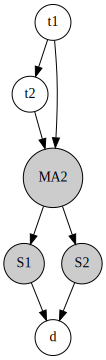

In [3]:
elfi.draw(m)

In [4]:
rej = elfi.Rejection(m['d'], batch_size=10000, seed=seed)

In [5]:
%time result = rej.sample(N, quantile=0.01)

rejection


CPU times: user 556 ms, sys: 48 ms, total: 604 ms
Wall time: 594 ms


In [6]:
%time result2 = rej.sample(N, threshold=0.2)

rejection


CPU times: user 204 ms, sys: 32 ms, total: 236 ms
Wall time: 235 ms


In [7]:
%time result3 = rej.sample(N, n_sim=1000000)
result3

rejection


CPU times: user 5.12 s, sys: 588 ms, total: 5.71 s
Wall time: 5.66 s


Method: Rejection
Number of samples: 1000
Number of simulations: 1000000
Threshold: 0.035
Sample means: t1: 0.574, t2: 0.128

## Sequential Monte Carlo ABC

In [8]:
smc = elfi.SMC(m['d'], batch_size=10000, seed=seed)

In [9]:
N = 1000
schedule = [0.7, 0.2, 0.05]
%time result_smc = smc.sample(N, schedule)

INFO:elfi.methods.parameter_inference:---------------- Starting round 0 ----------------


smc


INFO:elfi.methods.parameter_inference:---------------- Starting round 1 ----------------
INFO:elfi.methods.parameter_inference:---------------- Starting round 2 ----------------


CPU times: user 832 ms, sys: 48 ms, total: 880 ms
Wall time: 879 ms


## Bayesian Optimization

In [10]:
log_d = elfi.Operation(np.log, m['d'], name='log_d')

In [11]:
res_init = elfi.Rejection(log_d, batch_size=5).sample(20, quantile=1)

rejection


In [12]:
bounds = {n: (-2, 2) for n in m.parameter_names}

In [13]:
bounds

{'t1': (-2, 2), 't2': (-2, 2)}

In [14]:
bo = elfi.BayesianOptimization(
        log_d, initial_evidence=res_init.outputs, update_interval=10, batch_size=5, bounds=bounds)

## BOLFI